In [1]:
import pandas as pd
import numpy as np
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
# df = pd.read_csv('DOxy Testing (Summer) - Sheet1.csv')
df = pd.read_csv('DOxy Testing (Summer) - new method.csv')

In [3]:
print("The training data has {} rows and {} columns".format(df.shape[0], df.shape[1]))
df.head()

The training data has 800 rows and 3 columns


,Dissolved Oxygen (mg/L),Dissolved Oxygen (%),Sensor Readings
0,7.5,89,"red=6659, ir=46429, HR=-999, HRvalid=0, SPO2=9..."
1,7.5,89,"red=6666, ir=46456, HR=-999, HRvalid=0, SPO2=9..."
2,7.5,89,"red=6634, ir=46439, HR=-999, HRvalid=0, SPO2=9..."
3,7.5,89,"red=6646, ir=46456, HR=-999, HRvalid=0, SPO2=9..."
4,7.5,89,"red=6639, ir=46427, HR=-999, HRvalid=0, SPO2=9..."


In [4]:
# large_cap = df[['SpO2 (5 mm)', 'Dissolved Oxygen (mg/L)']]
# medium_cap = df[['SpO2 (2.5 mm)', 'Dissolved Oxygen (mg/L)']]
# small_cap = df[['SpO2 (1 mm)', 'Dissolved Oxygen (mg/L)']]

# getting the desired data in a usable format
sensor_data = df[['Sensor Readings']]
test = sensor_data["Sensor Readings"].str.split(", ", expand = True)
test.drop([2,3,4,5], axis=1, inplace=True)
test.columns = ["red", "ir"]
red = test["red"].str.split("red=", expand = True)
ir = test["ir"].str.split("ir=", expand = True)
red.drop([0], axis=1, inplace=True)
ir.drop([0], axis=1, inplace=True)
red.columns = ["red"]
ir.columns = ["ir"]
red['red'] = pd.to_numeric(red['red'])
ir['ir'] = pd.to_numeric(ir['ir'])
df.drop(["Dissolved Oxygen (%)", "Sensor Readings"], axis=1, inplace=True)
df = df.join([red, ir])
df

,Dissolved Oxygen (mg/L),red,ir
0,7.5,6659,46429
1,7.5,6666,46456
2,7.5,6634,46439
3,7.5,6646,46456
4,7.5,6639,46427
...,...,...,...
795,2.1,6238,41885
796,2.1,6229,41823
797,2.1,6235,41800
798,2.1,6230,41815


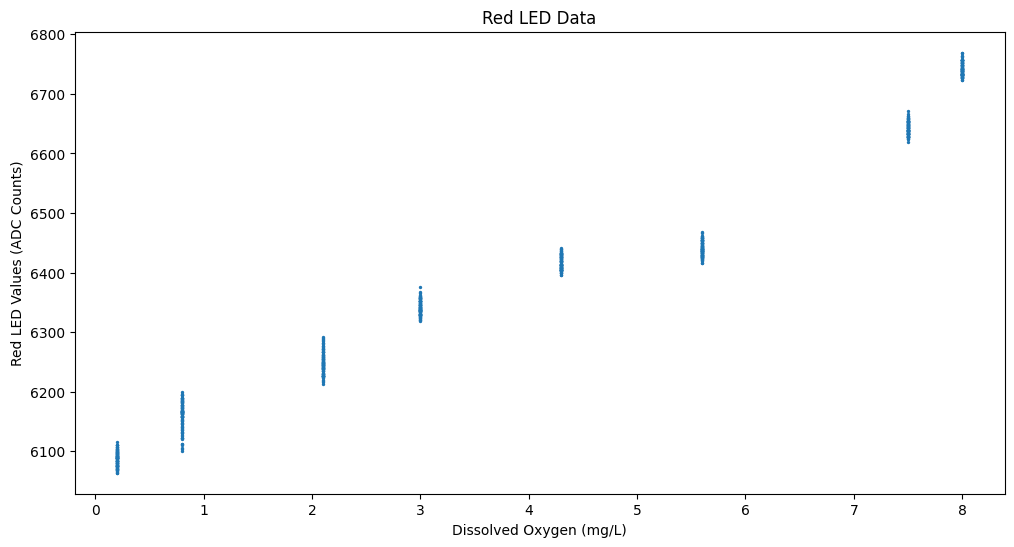

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
plt.scatter(df['Dissolved Oxygen (mg/L)'], df['red'], s = 2)
plt.xlabel('Dissolved Oxygen (mg/L)')
plt.ylabel('Red LED Values (ADC Counts)')
plt.title('Red LED Data')
plt.show()

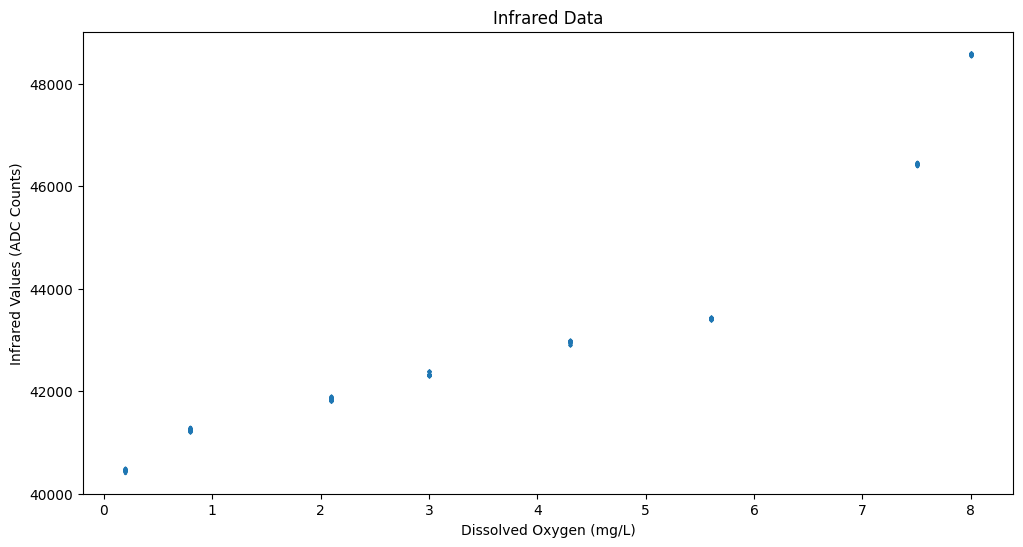

In [ ]:
plt.figure(figsize = (12, 6))
plt.scatter(df['Dissolved Oxygen (mg/L)'], df['ir'], s = 2)
plt.xlabel('Dissolved Oxygen (mg/L)')
plt.ylabel('Infrared Values (ADC Counts)')
plt.title('Infrared Data')
plt.show()

In [ ]:
# plt.figure(figsize = (12, 6))
# plt.scatter(df['SpO2 (2.5 mm)'], df['Dissolved Oxygen (mg/L)'], s = 1)
# plt.xlabel('SpO2 (2.5 mm)')
# plt.ylabel('Dissolved Oxygen (mg/L)')
# plt.show()

In [ ]:
# plt.figure(figsize = (12, 6))
# plt.scatter(df['SpO2 (1 mm)'], df['Dissolved Oxygen (mg/L)'], s = 7)
# plt.xlabel('SpO2 (1 mm)')
# plt.ylabel('Dissolved Oxygen (mg/L)')
# plt.show()

<ipython-input-7-a1e9e2acb474>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


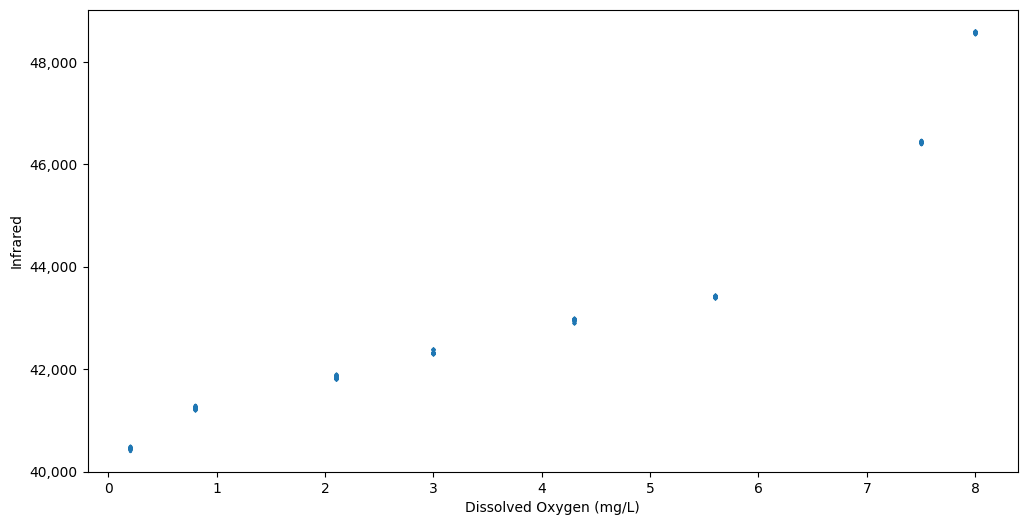

In [7]:
plt.figure(figsize = (12, 6))
plt.scatter(df['Dissolved Oxygen (mg/L)'], df['ir'], s = 2)
plt.xlabel('Dissolved Oxygen (mg/L)')
plt.ylabel('Infrared')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [8]:
x = np.array(df['ir'])
y = np.array(df['Dissolved Oxygen (mg/L)'])

In [9]:
G = np.stack((x, np.ones(x.shape))).T
print(G.shape)
print(G)

(800, 2)
[[4.6429e+04 1.0000e+00]
 [4.6456e+04 1.0000e+00]
 [4.6439e+04 1.0000e+00]
 ...
 [4.1800e+04 1.0000e+00]
 [4.1815e+04 1.0000e+00]
 [4.1890e+04 1.0000e+00]]


In [10]:
from scipy.odr import *
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score



In [11]:
def linear_f(p, x):
   m, c = p
   return m*x + c

def quadratic_f(p,x):
  a,b,c  = p
  return a*x**2 + b * x + c

def quartic_f(p, x):
    a, b, c, d, e = p
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

def cubic_f(p,x):
  a,b,c,d = p
  return a*x**3 + b*x**2 + c*x + d

#def sigmoidal_f(p,x):
 # a, b, c = p
  #return a/(1 + np.exp(-(b*(x-c))))
def sigmoidal_f(p,x):
  a, b, c = p
  return a/(1 + np.exp(-b*(x-c)))

In [12]:
linear_model = Model(linear_f)
quadratic_model = Model(quadratic_f)
quartic_model = Model(quartic_f)
sigmoidal_model = Model(sigmoidal_f)
cubic_model = Model(cubic_f)

In [13]:
kf = KFold(n_splits = 10)
performance_metrics = []

In [ ]:
###K-FOLD

In [14]:
performance_metrics_odr = []
performance_metrics_mse = []
average_performance_odr = []
average_performance_mse = []


for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    data = RealData(x_train.flatten(), y_train.flatten())
    odr = ODR(data, linear_model, beta0=[0, 0])
    out = odr.run()
    parameters = out.beta
    y_pred = linear_f(out.beta, x_test)

    orthogonal_distances = np.abs(y - linear_f(parameters,x))
    performance_metrics_odr.append(orthogonal_distances)
    average_performance_odr = np.mean(performance_metrics_odr)

    mse = np.mean((y_test - y_pred)**2)
    performance_metrics_mse.append(mse)
    average_performance_mse = np.mean(performance_metrics_mse)



#print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'Average Orthogonal Distances Error: {average_performance_odr}')
print(f'Average Root Mean Squares Error: {math.sqrt(average_performance_mse)}')
out.pprint()

Average Orthogonal Distances Error: 0.7823282209734495
Average Root Mean Squares Error: 1.0677552750859518
Beta: [ 9.97866155e-04 -3.93491281e+01]
Beta Std Error: [1.33346505e-05 5.82254674e-01]
Beta Covariance: [[ 1.96546094e-10 -8.56622456e-06]
 [-8.56622456e-06  3.74737461e-01]]
Residual Variance: 0.9046880581654658
Inverse Condition #: 1.3942149808608322e-06
Reason(s) for Halting:
  Sum of squares convergence


In [15]:
performance_metrics_odr = []
performance_metrics_mse = []
average_performance_odr = []
average_performance_mse = []


for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    data = RealData(x_train.flatten(), y_train.flatten())
    odr = ODR(data, quadratic_model, beta0=[1., 1., 0.])
    out = odr.run()
    parameters = out.beta
    y_pred = quadratic_f(out.beta, x_test)

    orthogonal_distances = np.abs(y - quadratic_f(parameters,x))
    performance_metrics_odr.append(orthogonal_distances)
    average_performance_odr = np.mean(performance_metrics_odr)

    mse = np.mean((y_test - y_pred)**2)
    performance_metrics_mse.append(mse)
    average_performance_mse = np.mean(performance_metrics_mse)

print(f'Average Orthogonal Distances Error: {average_performance_odr}')
print(f'Average Root Mean Squares Error: {math.sqrt(average_performance_mse)}')
out.pprint()

Average Orthogonal Distances Error: 0.32205900397768805
Average Root Mean Squares Error: 0.5291046892016603
Beta: [-1.44317450e-07  1.38645536e-02 -3.24970572e+02]
Beta Std Error: [2.49232045e-09 2.22274535e-04 4.93865845e+00]
Beta Covariance: [[ 3.89201578e-17 -3.46994432e-12  7.70276374e-08]
 [-3.46994432e-12  3.09561006e-07 -6.87600018e-03]
 [ 7.70276374e-08 -6.87600018e-03  1.52821625e+02]]
Residual Variance: 0.15960010394786878
Inverse Condition #: 1.5690811336174441e-13
Reason(s) for Halting:
  Sum of squares convergence


In [16]:
performance_metrics_odr = []
performance_metrics_mse = []
average_performance_odr = []
average_performance_mse = []


for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    data = RealData(x_train.flatten(), y_train.flatten())
    odr = ODR(data, linear_model, beta0=[1., 0.])
    out = odr.run()
    parameters = out.beta
    y_pred = linear_f(out.beta, x_test)

    orthogonal_distances = np.abs(y - linear_f(parameters,x))
    performance_metrics_odr.append(orthogonal_distances)
    average_performance_odr = np.mean(performance_metrics_odr)

    mse = np.mean((y_test - y_pred)**2)
    performance_metrics_mse.append(mse)
    average_performance_mse = np.mean(performance_metrics_mse)

print(f'Average Orthogonal Distances Error: {average_performance_odr}')
print(f'Average Root Mean Squares Error: {math.sqrt(average_performance_mse)}')
out.pprint()

Average Orthogonal Distances Error: 0.7823282014534458
Average Root Mean Squares Error: 1.0677552935523549
Beta: [ 9.97866205e-04 -3.93491303e+01]
Beta Std Error: [1.33346448e-05 5.82254449e-01]
Beta Covariance: [[ 1.96545926e-10 -8.56621758e-06]
 [-8.56621758e-06  3.74737171e-01]]
Residual Variance: 0.9046880581654534
Inverse Condition #: 1.3942424006741023e-07
Reason(s) for Halting:
  Sum of squares convergence


In [17]:
performance_metrics_odr = []
performance_metrics_mse = []
average_performance_odr = []
average_performance_mse = []


for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    data = RealData(x_train.flatten(), y_train.flatten())
    odr = ODR(data, cubic_model, beta0=[0., 0., 0., 0.])
    out = odr.run()
    parameters = out.beta
    y_pred = cubic_f(out.beta, x_test)

    orthogonal_distances = np.abs(y - cubic_f(parameters,x))
    performance_metrics_odr.append(orthogonal_distances)
    average_performance_odr = np.mean(performance_metrics_odr)

    mse = np.mean((y_test - y_pred)**2)
    performance_metrics_mse.append(mse)
    average_performance_mse = np.mean(performance_metrics_mse)


print(f'Average Orthogonal Distances Error: {average_performance_odr}')
print(f'Average Root Mean Squares Error: {math.sqrt(average_performance_mse)}')
out.pprint()

Average Orthogonal Distances Error: 0.32496990468152037
Average Root Mean Squares Error: 0.5046300190910952
Beta: [-3.75835656e-12  3.55378498e-07 -8.23127346e-03  0.00000000e+00]
Beta Std Error: [5.61681539e-14 5.02143855e-09 1.11829324e-04 0.00000000e+00]
Beta Covariance: [[ 2.03450012e-26 -1.81831129e-21  4.04599352e-17  0.00000000e+00]
 [-1.81831129e-21  1.62604936e-16 -3.62025163e-12  0.00000000e+00]
 [ 4.04599352e-17 -3.62025163e-12  8.06471123e-08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residual Variance: 0.15506814089641976
Inverse Condition #: 1.5397761644234447e-12
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence


In [18]:
performance_metrics_odr = []
performance_metrics_mse = []
average_performance_odr = []
average_performance_mse = []


for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    data = RealData(x_train.flatten(), y_train.flatten())
    odr = ODR(data, quartic_model, beta0=[0., 0., 0., 0., 0.])
    out = odr.run()
    parameters = out.beta
    y_pred = quartic_f(out.beta, x_test)

    orthogonal_distances = np.abs(y - quartic_f(parameters,x))
    performance_metrics_odr.append(orthogonal_distances)
    average_performance_odr = np.mean(performance_metrics_odr)

    mse = np.mean((y_test - y_pred)**2)
    performance_metrics_mse.append(mse)
    average_performance_mse = np.mean(performance_metrics_mse)


print(f'Average Orthogonal Distances Error: {average_performance_odr}')
print(f'Average Root Mean Squares Error: {math.sqrt(average_performance_mse)}')
out.pprint()

Average Orthogonal Distances Error: 0.33185836352964393
Average Root Mean Squares Error: 0.4952256154960962
Beta: [-9.43705203e-17  8.82469317e-12 -2.02647275e-07  0.00000000e+00
  0.00000000e+00]
Beta Std Error: [1.29329617e-18 1.15882235e-13 2.58640913e-09 0.00000000e+00
 0.00000000e+00]
Beta Covariance: [[ 1.06228354e-35 -9.51569706e-31  2.12212228e-26  0.00000000e+00
   0.00000000e+00]
 [-9.51569706e-31  8.52860878e-26 -1.90301284e-21  0.00000000e+00
   0.00000000e+00]
 [ 2.12212228e-26 -1.90301284e-21  4.24853227e-17  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
Residual Variance: 0.15745466367030822
Inverse Condition #: 1.499888957326142e-12
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence


In [19]:
performance_metrics_odr = []
performance_metrics_mse = []
average_performance_odr = []
average_performance_mse = []


for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    data = RealData(x_train.flatten(), y_train.flatten())
    odr = ODR(data, sigmoidal_model, beta0=[4,0,44000])
    out = odr.run()
    parameters = out.beta
    y_pred = sigmoidal_f(out.beta, x_test)

    orthogonal_distances = np.abs(y - sigmoidal_f(parameters,x))
    performance_metrics_odr.append(orthogonal_distances)
    average_performance_odr = np.mean(performance_metrics_odr)

    mse = np.mean((y_test - y_pred)**2)
    performance_metrics_mse.append(mse)
    average_performance_mse = np.mean(performance_metrics_mse)


print(f'Average Orthogonal Distances Error: {average_performance_odr}')
print(f'Average Root Mean Squares Error: {math.sqrt(average_performance_mse)}')
out.pprint()

Average Orthogonal Distances Error: 0.1749733093343491
Average Root Mean Squares Error: 0.24009941333809892
Beta: [7.77769263e+00 1.34745562e-03 4.27430944e+04]
Beta Std Error: [1.25950668e-02 8.80686215e-06 4.87724822e+00]
Beta Covariance: [[ 5.25816702e-03 -1.03106454e-06  1.17933971e+00]
 [-1.03106454e-06  2.57084461e-09 -2.94419574e-04]
 [ 1.17933971e+00 -2.94419574e-04  7.88466320e+02]]
Residual Variance: 0.030169392860906728
Inverse Condition #: 0.006778046652760319
Reason(s) for Halting:
  Sum of squares convergence


In [20]:
performance_metrics = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    data = RealData(x_train.flatten(), y_train.flatten())
    odr = ODR(data, sigmoidal_model, beta0=[4,0,44000])
    out = odr.run()
    parameters = out.beta

    orthogonal_distances = np.abs(y - sigmoidal_f(parameters,x))
    performance_metrics.append(orthogonal_distances)
    average_performance = np.mean(performance_metrics)

print(f'Average Orthogonal Distances: {average_performance}')
print(f'Average Mean Squares Error: {math.sqrt(average_performance_mse)}')
out.pprint()

Average Orthogonal Distances: 0.1749733093343491
Average Mean Squares Error: 0.24009941333809892
Beta: [7.77769263e+00 1.34745562e-03 4.27430944e+04]
Beta Std Error: [1.25950668e-02 8.80686215e-06 4.87724822e+00]
Beta Covariance: [[ 5.25816702e-03 -1.03106454e-06  1.17933971e+00]
 [-1.03106454e-06  2.57084461e-09 -2.94419574e-04]
 [ 1.17933971e+00 -2.94419574e-04  7.88466320e+02]]
Residual Variance: 0.030169392860906728
Inverse Condition #: 0.006778046652760319
Reason(s) for Halting:
  Sum of squares convergence


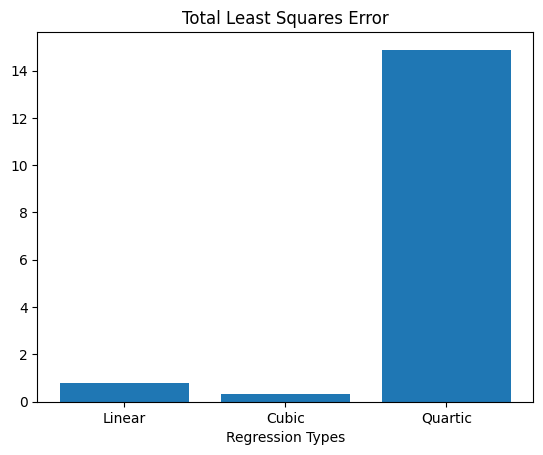

In [21]:
import matplotlib.pyplot as plt

# Data
categories = ['Linear', 'Cubic', 'Quartic']
values = [0.7823282014534458, 0.32497092511552284, 14.878849852055067]

# Create the bar graph
plt.bar(categories, values)

# Add title and labels
plt.title('Total Least Squares Error')
plt.xlabel('Regression Types')
#plt.ylabel('')

# Show the graph
plt.show()

In [ ]:
### ODR TEST ###
### ODR TEST ###
### ODR TEST ###
### ODR TEST ###
### ODR TEST ###
### ODR TEST ###
### ODR TEST ###
### ODR TEST ###
### ODR TEST ###
### ODR TEST ###
### ODR TEST ###
### ODR TEST ###


In [22]:
data = RealData(x, y)
odr = ODR(data, linear_model, beta0=[0., 1.])
out = odr.run()
out.pprint()

Beta: [ 1.00504496e-03 -3.96912204e+01]
Beta Std Error: [1.24474906e-05 5.41292183e-01]
Beta Covariance: [[ 1.88461098e-10 -8.18104344e-06]
 [-8.18104344e-06  3.56386805e-01]]
Residual Variance: 0.8221326478808298
Inverse Condition #: 1.3616036229391133e-05
Reason(s) for Halting:
  Sum of squares convergence


In [23]:
data = RealData(x, y)
odr = ODR(data, quadratic_model, beta0=[0., 1., 1.])
out = odr.run()
out.pprint()

Beta: [-1.43685498e-07  1.38173281e-02 -3.24154326e+02]
Beta Std Error: [2.47021677e-09 2.20333711e-04 4.89615564e+00]
Beta Covariance: [[ 3.88818570e-17 -3.46705355e-12  7.69768135e-08]
 [-3.46705355e-12  3.09341912e-07 -6.87212105e-03]
 [ 7.69768135e-08 -6.87212105e-03  1.52752138e+02]]
Residual Variance: 0.15693619990381716
Inverse Condition #: 1.5016264305486862e-11
Reason(s) for Halting:
  Sum of squares convergence


In [24]:
data = RealData(x, y)
odr = ODR(data, cubic_model, beta0=[0., 1.,1.,1.])
out = odr.run()
out.pprint()

Beta: [-3.76624980e-12  3.56787253e-07 -8.30145175e-03  1.00000000e+00]
Beta Std Error: [5.53240748e-14 4.94609102e-09 1.10150299e-04 0.00000000e+00]
Beta Covariance: [[ 2.03423639e-26 -1.81814357e-21  4.04579310e-17  0.00000000e+00]
 [-1.81814357e-21  1.62591302e-16 -3.61998300e-12  0.00000000e+00]
 [ 4.04579310e-17 -3.61998300e-12  8.06388750e-08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residual Variance: 0.15046202452611504
Inverse Condition #: 1.480283464080269e-11
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence


In [25]:
data = RealData(x, y)
odr2 = ODR(data, quartic_model, beta0=[0., 1., 1., 1., 1.])
out2 = odr2.run()
out2.pprint()


Beta: [-1.15539131e-14  1.53699643e-09 -6.79839659e-05  1.00000000e+00
  1.00000000e+00]
Beta Std Error: [2.19149156e-17 1.96341159e-12 4.38149399e-08 0.00000000e+00
 0.00000000e+00]
Beta Covariance: [[ 1.06215889e-35 -9.51369282e-31  2.12145357e-26  0.00000000e+00
   0.00000000e+00]
 [-9.51369282e-31  8.52574979e-26 -1.90210863e-21  0.00000000e+00
   0.00000000e+00]
 [ 2.12145357e-26 -1.90210863e-21  4.24574907e-17  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
Residual Variance: 45.21578943297902
Inverse Condition #: 1.4493289572037943e-11
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence


In [26]:
data = RealData(x, y)
odr3 = ODR(data, sigmoidal_model, beta0=[1.,0.,0.])
out3 = odr3.run()
out3.pprint()

Beta: [ 5.11289778e+00  2.89449203e-05 -6.48382258e-11]
Beta Std Error: [6.23996564e+01 1.27160366e-03 0.00000000e+00]
Beta Covariance: [[ 5.40197282e+02 -1.10083223e-02  0.00000000e+00]
 [-1.10083223e-02  2.24332158e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residual Variance: 7.207953936609034
Inverse Condition #: 3.9823290094418146e-07
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence


<ipython-input-11-e155926b90d1>:22: RuntimeWarning: overflow encountered in exp
  return a/(1 + np.exp(-b*(x-c)))


In [27]:
for fold in range(10):
  start_index = fold * len(x) // 10
  end_index = (fold + 1) * 10 if fold < 10 else len(x)

  x_f_test = x[start_index:end_index];
  y_f_test = y[start_index:end_index];

  x_f_train = np.concatenate([x[:start_index], x[end_index:]])
  y_f_train = np.concatenate([y[:start_index], y[end_index:]])

  odr = ODR(data, cubic_model, beta=[1.,1.,1.,0.])
  out = odr.run()

TypeError: ODR.__init__() got an unexpected keyword argument 'beta'

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# split data into 70% training, 30% testing
# shuffle rows
df = df.sample(frac = 1)
X_train, X_test, y_train, y_test = train_test_split(df.drop("Dissolved Oxygen (mg/L)", axis=1),
                                                        df["Dissolved Oxygen (mg/L)"], test_size = 0.3,
                                                        random_state = 0)

In [ ]:
# # split data into 70% training, 30% testing
# X_train5, X_test5, y_train5, y_test5 = train_test_split(large_cap.drop("Dissolved Oxygen (mg/L)", axis=1),
#                                                         large_cap["Dissolved Oxygen (mg/L)"], test_size = 0.3,
#                                                         random_state = 0, stratify = large_cap["Dissolved Oxygen (mg/L)"])

In [ ]:
# X_train25, X_test25, y_train25, y_test25 = train_test_split(medium_cap.drop("Dissolved Oxygen (mg/L)", axis=1),
#                                                         medium_cap["Dissolved Oxygen (mg/L)"], test_size = 0.3,
#                                                         random_state = 0, stratify = medium_cap["Dissolved Oxygen (mg/L)"])

In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(small_cap.drop("Dissolved Oxygen (mg/L)", axis=1),
#                                                         small_cap["Dissolved Oxygen (mg/L)"], test_size = 0.3,
#                                                         random_state = 0, stratify = small_cap["Dissolved Oxygen (mg/L)"])

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

linear_regression = LinearRegression()
svm = SVR()

In [36]:
from sklearn.model_selection import cross_val_score

models = {}
models['Linear Regression'] = linear_regression
models['SVM'] = svm

scores = {}
for name in models:
    scores[name] = {}
    for scorer in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']:
    #for scorer in ['neg_mean_absolute_error']:
        scores[name][scorer] = cross_val_score(models[name], X_train, y_train, cv = 10, scoring = scorer)

In [37]:
def line(name):
    return '*'*(25-len(name)//2)

for name in models:
    print(line(name), name, 'Model Validation', line(name))
    for scorer in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']:
    #for scorer in ['neg_mean_absolute_error']:
        mean = round(np.mean(scores[name][scorer])*100,2)
        stdev = round(np.std(scores[name][scorer])*100,2)
        print ("Mean {}:".format(scorer),"\n", mean, "+-",stdev)
        print()

***************** Linear Regression Model Validation *****************
Mean neg_mean_squared_error: 
 -19.55 +- 2.77

Mean neg_root_mean_squared_error: 
 -44.1 +- 3.21

Mean neg_mean_absolute_error: 
 -35.99 +- 3.49

************************ SVM Model Validation ************************
Mean neg_mean_squared_error: 
 -85.61 +- 10.03

Mean neg_root_mean_squared_error: 
 -92.35 +- 5.66

Mean neg_mean_absolute_error: 
 -75.29 +- 5.87



In [38]:
from sklearn.metrics import mean_squared_error

preds={}
for name in models:
    models[name].fit(X_train, y_train)
    preds[name] = models[name].predict(X_test)
mses={}
for name in models:
    mses[name] = mean_squared_error(y_test, preds[name])
    print(name, ":",mses[name])
mses = pd.DataFrame(mses.values(), index = mses.keys(), columns = ["MSE"])


Linear Regression : 0.2190915515351803
SVM : 0.9046351886091669


In [ ]:
###3/24 revisiosn fuck you mdpi

In [39]:
linear_coef = linear_regression.coef_
linear_intercept = linear_regression.intercept_
print(linear_coef)
print(linear_intercept)

[ 0.01562521 -0.00024381]
-85.24170289290666


<Axes: >

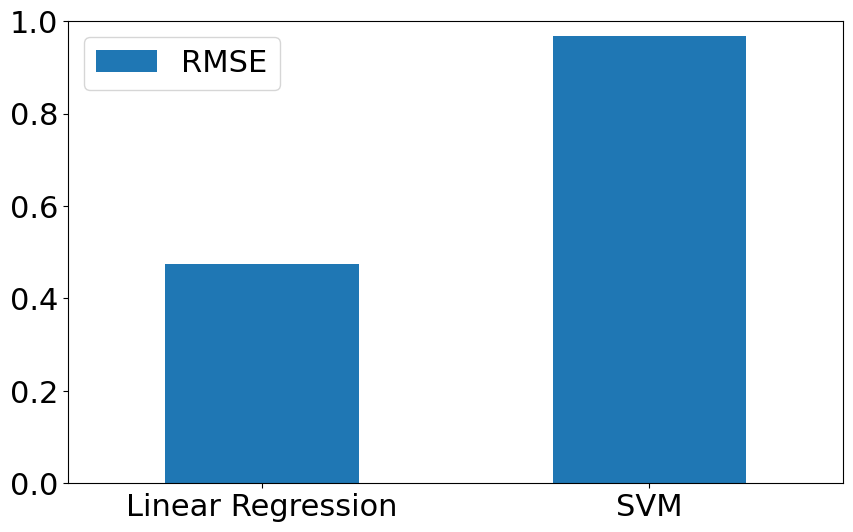

In [40]:
#plt.rcParams.update({'font.size': 22})
#mses.plot(kind = "bar",  ylim = [0,1], figsize = (10,6), rot = 0)

plt.rcParams.update({'font.size':22})
rmses = {}
rmses["Linear Regression"] = 0.475555
rmses["SVM"] = 0.968569
rmses = pd.DataFrame(rmses.values(), index = rmses.keys(), columns = ["RMSE"])
rmses.plot(kind = "bar",  ylim = [0,1], figsize = (10,6), rot = 0)

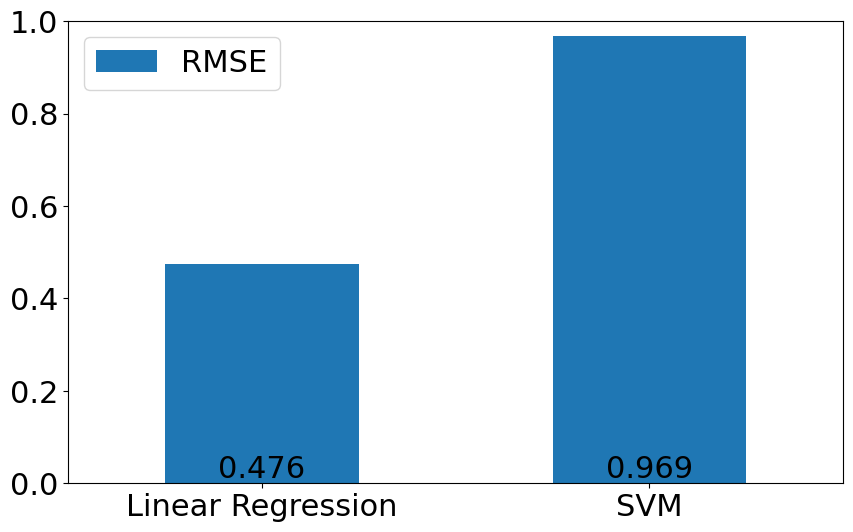

In [ ]:
# Assuming rmses is already defined as per your code snippet
rmses = {"Linear Regression": 0.475555, "SVM":0.968569}
rmses = pd.DataFrame(rmses.values(), index = rmses.keys(), columns = ["RMSE"])

plt.rcParams.update({'font.size': 22})
ax = rmses.plot(kind="bar", ylim=[0, 1], figsize=(10, 6), rot=0)

# Adding text labels above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., 0),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

In [ ]:
# Assuming X_train is your training dataset and has shape (n_samples, n_features)
feature_index = 0  # Index of the feature to visualize
feature_range = np.linspace(X_train[:, feature_index].min(), X_train[:, feature_index].max(), 100)
other_features_mean = np.mean(X_train, axis=0)

# Create a test dataset based on the feature range, keeping other features constant
X_test_range = np.tile(other_features_mean, (len(feature_range), 1))
X_test_range[:, feature_index] = feature_range

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# split data into 70% training, 30% testing
X_trainR, X_testR, y_trainR, y_testR = train_test_split(df.drop(["Dissolved Oxygen (mg/L)", "ir"], axis=1),
                                                        df["Dissolved Oxygen (mg/L)"], test_size = 0.3,
                                                        random_state = 0)

In [ ]:
linear_regression = LinearRegression()
svm = SVR()

In [ ]:
models = {}
models['Linear Regression'] = linear_regression
models['SVM'] = svm

scores = {}
for name in models:
    scores[name] = {}
    for scorer in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']:
    #for scorer in ['neg_mean_absolute_error']:
        scores[name][scorer] = cross_val_score(models[name], X_trainR, y_trainR, cv = 10, scoring = scorer)

In [ ]:
for name in models:
    print(line(name), name, 'Model Validation', line(name))
    for scorer in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']:
    #for scorer in ['neg_mean_absolute_error']:
        mean = round(np.mean(scores[name][scorer])*100,2)
        stdev = round(np.std(scores[name][scorer])*100,2)
        print ("Mean {}:".format(scorer),"\n", mean, "+-",stdev)
        print()

***************** Linear Regression Model Validation *****************
Mean neg_mean_squared_error: 
 -22.24 +- 3.42

Mean neg_root_mean_squared_error: 
 -47.02 +- 3.6

Mean neg_mean_absolute_error: 
 -36.92 +- 3.25

************************ SVM Model Validation ************************
Mean neg_mean_squared_error: 
 -8.55 +- 1.95

Mean neg_root_mean_squared_error: 
 -29.06 +- 3.28

Mean neg_mean_absolute_error: 
 -20.19 +- 2.67



Linear Regression : 0.21686806183816543
SVM : 0.07282513767111945


<Axes: >

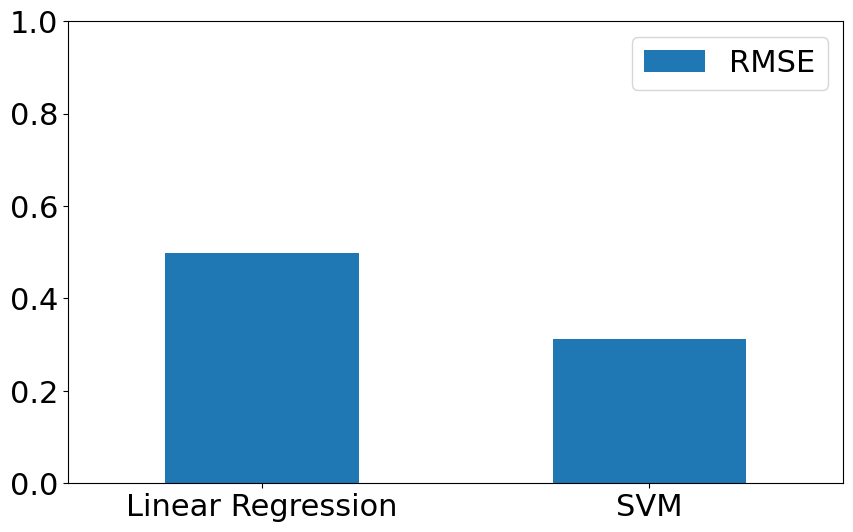

In [ ]:
preds={}
for name in models:
    models[name].fit(X_trainR, y_trainR)
    preds[name] = models[name].predict(X_testR)
mses={}
for name in models:
    mses[name] = mean_squared_error(y_testR, preds[name])
    print(name, ":",mses[name])
mses = pd.DataFrame(mses.values(), index = mses.keys(), columns = ["MSE"])

#mses.plot(kind = "bar",  ylim = [0,1], figsize = (10,6), rot = 0)

plt.rcParams.update({'font.size':22})
rmses = {}
rmses["Linear Regression"] = 0.497569
rmses["SVM"] = 0.312477
rmses = pd.DataFrame(rmses.values(), index = rmses.keys(), columns = ["RMSE"])
rmses.plot(kind = "bar",  ylim = [0,1], figsize = (10,6), rot = 0)

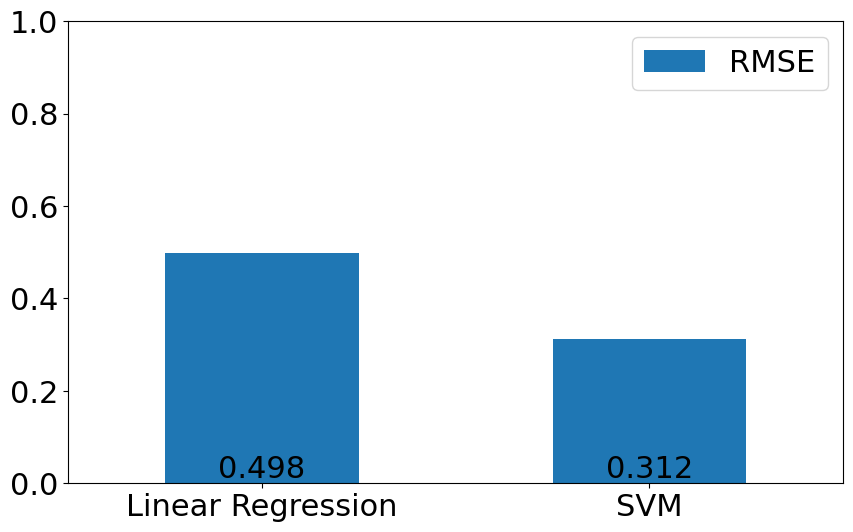

In [ ]:
# Assuming rmses is already defined as per your code snippet
rmses = {"Linear Regression": 0.497569, "SVM": 0.312477}
rmses = pd.DataFrame(rmses.values(), index = rmses.keys(), columns = ["RMSE"])

plt.rcParams.update({'font.size': 22})
ax = rmses.plot(kind="bar", ylim=[0, 1], figsize=(10, 6), rot=0)

# Adding text labels above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., 0),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

In [ ]:
# split data into 70% training, 30% testing
X_trainI, X_testI, y_trainI, y_testI = train_test_split(df.drop(["Dissolved Oxygen (mg/L)", "red"], axis=1),
                                                        df["Dissolved Oxygen (mg/L)"], test_size = 0.3,
                                                        random_state = 0, stratify=df["Dissolved Oxygen (mg/L)"])

In [ ]:
linear_regression = LinearRegression()
# svm = SVR(kernel = 'poly', degree = 2)
svm = SVR()

In [ ]:
models = {}
models['Linear Regression'] = linear_regression
models['SVM'] = svm

scores = {}
for name in models:
    scores[name] = {}
    for scorer in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']:
    #for scorer in ['neg_mean_absolute_error']:
        scores[name][scorer] = cross_val_score(models[name], X_trainI, y_trainI, cv = 10, scoring = scorer)

In [ ]:
for name in models:
    print(line(name), name, 'Model Validation', line(name))
    for scorer in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']:
    #for scorer in ['neg_mean_absolute_error']:
        mean = round(np.mean(scores[name][scorer])*100,2)
        stdev = round(np.std(scores[name][scorer])*100,2)
        print ("Mean {}:".format(scorer),"\n", mean, "+-",stdev)
        print()

***************** Linear Regression Model Validation *****************
Mean neg_mean_squared_error: 
 -82.6 +- 8.23

Mean neg_root_mean_squared_error: 
 -90.77 +- 4.53

Mean neg_mean_absolute_error: 
 -78.57 +- 4.54

************************ SVM Model Validation ************************
Mean neg_mean_squared_error: 
 -1.32 +- 0.21

Mean neg_root_mean_squared_error: 
 -11.48 +- 0.88

Mean neg_mean_absolute_error: 
 -9.97 +- 0.79



Linear Regression : 0.8198857029452997
SVM : 0.013035758975252972


<Axes: >

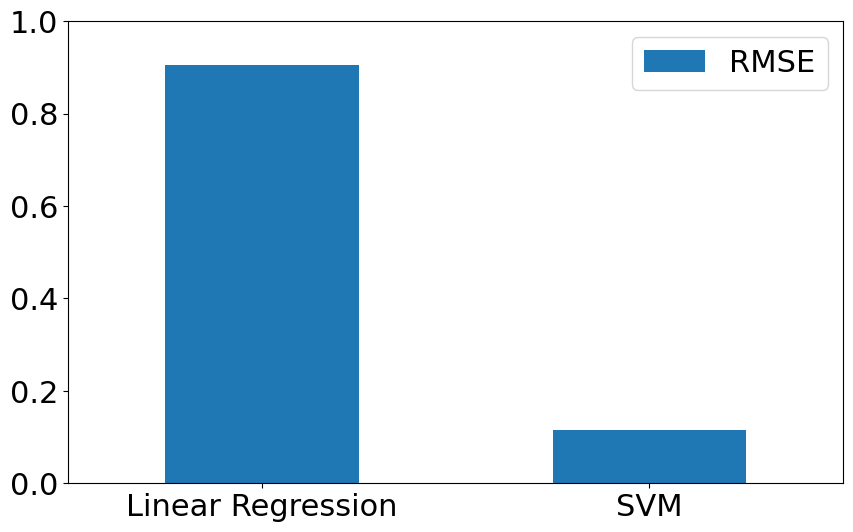

In [ ]:
preds={}
for name in models:
    models[name].fit(X_trainI, y_trainI)
    preds[name] = models[name].predict(X_testI)
mses={}
for name in models:
    mses[name] = mean_squared_error(y_testI, preds[name])
    print(name, ":",mses[name])
#mses = pd.DataFrame(mses.values(), index = mses.keys(), columns = ["MSE"])
plt.rcParams.update({'font.size':22})
rmses = {}
rmses["Linear Regression"] = 0.904904
rmses["SVM"] = 0.114554
rmses = pd.DataFrame(rmses.values(), index = rmses.keys(), columns = ["RMSE"])
rmses.plot(kind = "bar",  ylim = [0,1], figsize = (10,6), rot = 0)

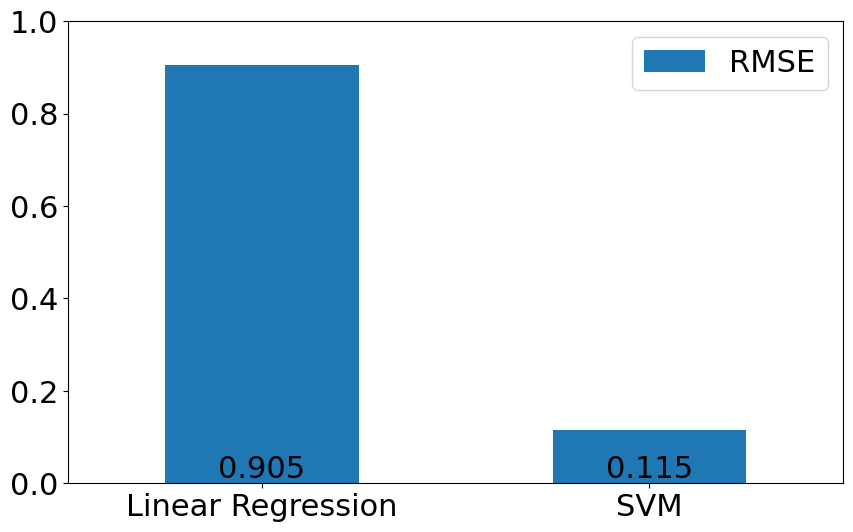

In [ ]:
# Assuming rmses is already defined as per your code snippet
rmses = {"Linear Regression": 0.904904, "SVM": 0.114554}
rmses = pd.DataFrame(rmses.values(), index = rmses.keys(), columns = ["RMSE"])

plt.rcParams.update({'font.size': 22})
ax = rmses.plot(kind="bar", ylim=[0, 1], figsize=(10, 6), rot=0)

# Adding text labels above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., 0),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

### SVM model on ir performed the best as shown above, using this model ###

In [ ]:
svr = svm.fit(X_trainI, y_trainI)
print("SVM Train Accuracy: ", svr.score(X_trainI, y_trainI))
y_predict = svr.predict(X_testI)
print("SVM Test Accuracy: ", svr.score(X_testI, y_testI))

#from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_testI, y_predict))
# vectors = []
# for i in svr.support_:
#     vectors.append([X_trainI[i][1], y_trainI[i]])
# out = svr._intercept_[0]
# for vect, coef in zip(vectors, svr._dual_coef_[0]):
#     out = out + coef * math.exp(-(vect[0] - x) ** 2 * gamma)
# print(svr._intercept_[0])
# print(svr._dual_coef_[0])
# print(svr.support_)

NameError: name 'X_trainI' is not defined

In [ ]:
# X_grid = np.arange(min(X_trainI), max(X_trainI), 0.1)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X_trainI, y_trainI, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# # plt.title(‘Truth or Bluff (Support Vector Regression Model(High Resolution))’)
# # plt.xlabel(‘Position level’)
# # plt.ylabel(‘Salary’)
# plt.show()

==============================================================================================================

In [ ]:
# models = {}
# #models['Linear Regression'] = linear_regression
# models['SVM'] = svm

# scores = {}
# for name in models:
#     scores[name] = {}
#     #for scorer in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']:
#     for scorer in ['neg_mean_absolute_error']:
#         scores[name][scorer] = cross_val_score(models[name], X_train25, y_train25, cv = 10, scoring = scorer)

# for name in models:
#     print(line(name), name, 'Model Validation', line(name))
#     #for scorer in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']:
#     for scorer in ['neg_mean_absolute_error']:
#         mean = round(np.mean(scores[name][scorer])*100,2)
#         stdev = round(np.std(scores[name][scorer])*100,2)
#         print ("Mean {}:".format(scorer),"\n", mean, "+-",stdev)
#         print()

In [ ]:
# models = {}
# models['Linear Regression'] = linear_regression
# models['SVM'] = svm

# scores = {}
# for name in models:
#     scores[name] = {}
#     for scorer in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']:
#         scores[name][scorer] = cross_val_score(models[name], X_train1, y_train1, cv = 10, scoring = scorer)

# for name in models:
#     print(line(name), name, 'Model Validation', line(name))
#     for scorer in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']:
#         mean = round(np.mean(scores[name][scorer])*100,2)
#         stdev = round(np.std(scores[name][scorer])*100,2)
#         print ("Mean {}:".format(scorer),"\n", mean, "+-",stdev)
#         print()

In [43]:
y = df["Dissolved Oxygen (mg/L)"].to_numpy()
x = df["ir"].to_numpy()
plt.rcParams.update({'font.size': 15})

y = ax + bx² + c
a: 0.013817343244217304
b: -1.4368566885054733e-07
c: -324.15466198371894


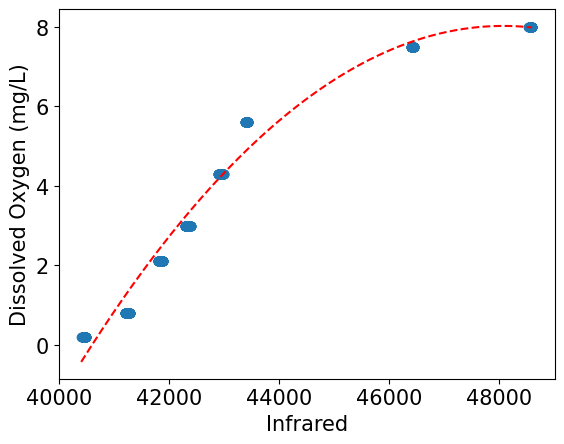

In [44]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

# curve fit
popt, pcov = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
# print('y = ax + bx^2 + c')
print("y = ax + bx\u00b2 + c")
#print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
print('a:', a)
print('b:', b)
print('c:', c)
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.title("Quadratic Function")
pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared")
pyplot.show()

In [ ]:
from sklearn.metrics import r2_score
import math

y_pred = objective(x, *popt)
print(r2_score(y, y_pred))
print(math.sqrt(mean_squared_error(y, y_pred)))

0.9792085880393498
0.39540886343880893


y = ax + bx² + cx³ + d
a: -0.027063903922100913
b: 7.805958130955088e-07
c: -6.950245913664189e-12
d: 277.29068116759123


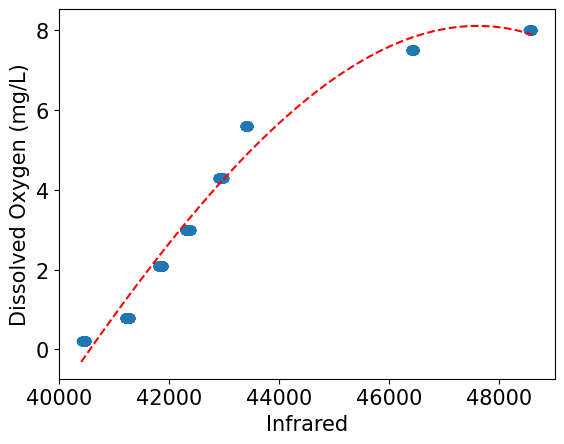

In [ ]:
def objective(x, a, b, c, d):
    return a * x + b * x**2 + c * x**3 + d
# curve fit
popt, pcov = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d= popt
# print('y = ax + bx^2 + cx^3 + d')
print("y = ax + bx\u00b2 + cx\u00b3 + d")
#print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f' % (a, b, c, d))
print('a:', a)
print('b:', b)
print('c:', c)
print('d:', d)
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.title("Cubic Function")

pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared")
pyplot.show()

In [ ]:
y_pred = objective(x, *popt)
print('R2: ', r2_score(y, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y, y_pred)))

R2:  0.9802949197361496
RMSE: 0.38494041703277093


y = ax + bx² + cx³ + dx⁴ + e
a: -6.324316851636186
b: 0.0002138730024293745
c: -3.206792249626497e-09
d: 1.7990579697508232e-14
e: 69955.23592083159


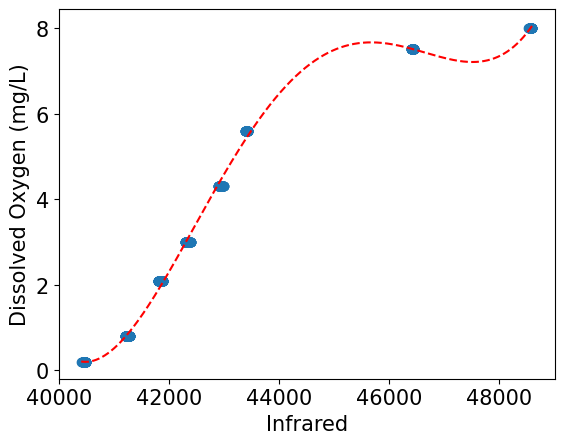

In [ ]:
def objective(x, a, b, c, d, e):
    return a * x + b * x**2 + c * x**3 + d * x**4 + e
# curve fit
popt, pcov = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e= popt
# print('y = ax + bx^2 + cx^3 + dx^4 + e')
print("y = ax + bx\u00b2 + cx\u00b3 + dx\u2074 + e")
#print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f' % (a, b, c, d, e))
print('a:', a)
print('b:', b)
print('c:', c)
print('d:', d)
print('e:', e)
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.title("Quartic Function")
pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared")
pyplot.show()

In [ ]:
y_pred = objective(x, *popt)
print('R2: ', r2_score(y, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y, y_pred)))

R2:  0.9983513213760874
RMSE: 0.11134543387938199


In [ ]:
### ODR MANUALLY INPUT COEFFICIENTS ###
### ODR MANUALLY INPUT COEFFICIENTS ###
### ODR MANUALLY INPUT COEFFICIENTS ###
### ODR MANUALLY INPUT COEFFICIENTS ###### ODR MANUALLY INPUT COEFFICIENTS ###
### ODR MANUALLY INPUT COEFFICIENTS ###
### ODR MANUALLY INPUT COEFFICIENTS ###
### ODR MANUALLY INPUT COEFFICIENTS ###
### ODR MANUALLY INPUT COEFFICIENTS ###
### ODR MANUALLY INPUT COEFFICIENTS ###


y = ax + bx² + cx³ + d
a: -0.00830144497
b: 3.56786949e-07
c: -3.76624639e-12
d: 1.0


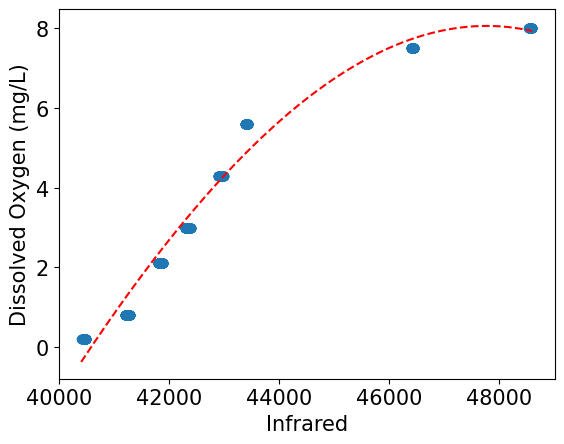

In [ ]:
c = -3.75838065e-12
b = 3.55380650e-07
a = -8.23132128e-03
d =  0.00000000e+00
#Beta: [-3.76624639e-12  3.56786949e-07 -8.30144497e-03  1.00000000e+00]
c = -3.76624639e-12
b = 3.56786949e-07
a = -8.30144497e-03
d = 1.00000000e+00



def objective(x, a, b, c, d):
    return a * x + b * x**2 + c * x**3 + d
# print('y = ax + bx^2 + cx^3 + dx^4 + e')
print("y = ax + bx\u00b2 + cx\u00b3 + d")
#print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f' % (a, b, c, d, e))
print('a:', a)
print('b:', b)
print('c:', c)
print('d:', d)
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.title("Quartic Function")
pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared")
pyplot.show()


y = ax + bx² + cx³ + d
a: -0.00830144497
b: 3.56786949e-07
c: -3.76624639e-12
d: 1.0


<ipython-input-61-f20df12323ad>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


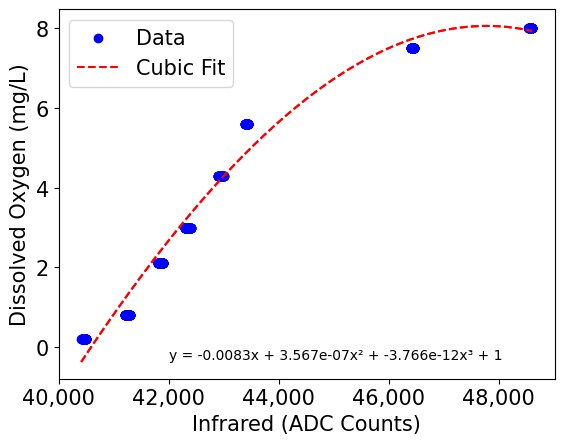

In [61]:
c = -3.75838065e-12
b = 3.55380650e-07
a = -8.23132128e-03
d =  0.00000000e+00

#Beta: [-3.76624639e-12  3.56786949e-07 -8.30144497e-03  1.00000000e+00]
c = -3.76624639e-12
b = 3.56786949e-07
a = -8.30144497e-03
d = 1.00000000e+00



def objective(x, a, b, c, d):
    return a * x + b * x**2 + c * x**3 + d
# print('y = ax + bx^2 + cx^3 + dx^4 + e')
print("y = ax + bx\u00b2 + cx\u00b3 + d")
#print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f' % (a, b, c, d, e))
print('a:', a)
print('b:', b)
print('c:', c)
print('d:', d)
# plot input vs output
plt.scatter(x, y, label='Data', color='blue')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.title("Quartic Function")
plt.plot(x_line, y_line, '--', label='Cubic Fit', color='red')
# pyplot.title("Quartic Function")
pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared (ADC Counts)")
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
pyplot.legend()

# Center coordinates
center_x = np.mean(xlim)
center_y = np.mean(ylim)
pyplot.text(center_x-2500, y.min() - .5, 'y = -0.0083x + 3.567e-07x\u00b2 + -3.766e-12x\u00b3 + 1', fontsize = 10)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
pyplot.show()

In [ ]:
y_pred = objective(x, a, b, c, d)
print('R2: ', r2_score(y, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y, y_pred)))

R2:  0.980066313458466
RMSE: 0.3871668996102511


y = ax + bx² + c
a: 0.0138173492
b: -1.43685735e-07
c: -324.154795


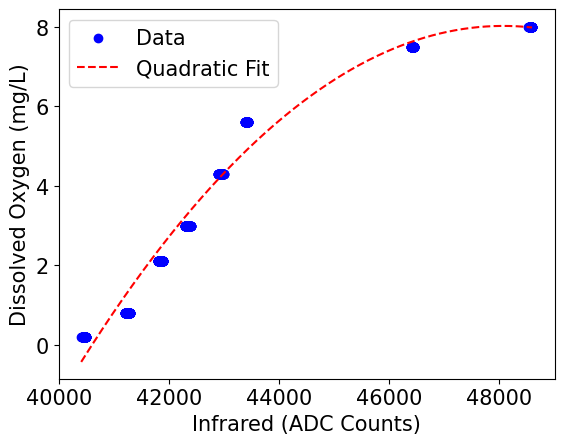

In [ ]:

#Beta: [-3.76624639e-12  3.56786949e-07 -8.30144497e-03  1.00000000e+00]
#Beta: [-1.43685735e-07  1.38173492e-02 -3.24154795e+02]


b = -1.43685735e-07
a = 1.38173492e-02
c = -3.24154795e+02

def objective(x, a, b, c):
    return a * x + b * x**2 + c
# print('y = ax + bx^2 + cx^3 + dx^4 + e')
print("y = ax + bx\u00b2 + c")
#print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f' % (a, b, c, d, e))
print('a:', a)
print('b:', b)
print('c:', c)
# plot input vs output
plt.scatter(x, y, label='Data', color='blue')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--',label = 'Quadratic Fit', color='red')
# pyplot.title("Quartic Function")
plt.legend()
pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared (ADC Counts)")
pyplot.show()

<ipython-input-62-1014c6d3c6a9>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


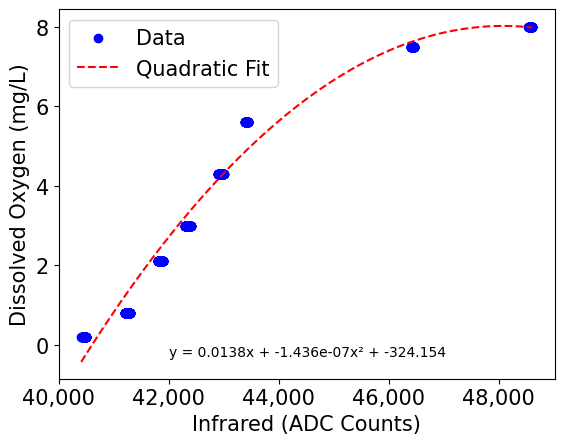

<ipython-input-62-1014c6d3c6a9>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0.0, 0, '0'),
 Text(0.2, 0, '0'),
 Text(0.4, 0, '0'),
 Text(0.6000000000000001, 0, '1'),
 Text(0.8, 0, '1'),
 Text(1.0, 0, '1')]

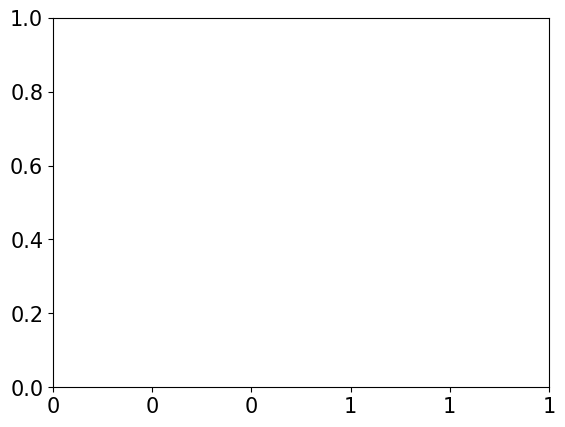

In [62]:

#Beta: [-3.76624639e-12  3.56786949e-07 -8.30144497e-03  1.00000000e+00]
#Beta: [-1.43685735e-07  1.38173492e-02 -3.24154795e+02]


b = -1.43685735e-07
a = 1.38173492e-02
c = -3.24154795e+02

def objective(x, a, b, c):
    return a * x + b * x**2 + c
# print('y = ax + bx^2 + cx^3 + dx^4 + e')
# plot input vs output
plt.scatter(x, y, label='Data', color='blue')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--',label = 'Quadratic Fit', color='red')
# pyplot.title("Quartic Function")
plt.legend()
pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared (ADC Counts)")
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# Center coordinates
center_x = np.mean(xlim)
center_y = np.mean(ylim)
pyplot.text(center_x-2500, y.min() - .5, 'y = 0.0138x + -1.436e-07x\u00b2 + -324.154', fontsize = 10)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
#a: 0.0138173492
#b: -1.43685735e-07
#c: -324.154795
#
#
pyplot.show()
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

In [ ]:
y_pred = objective(x, a,b,c)
print('R2: ', r2_score(y, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y, y_pred)))

R2:  0.9792085880392908
RMSE: 0.3954088634393706


y = ax + bx² + cx³ + dx⁴ + e
a: 0.0
b: -2.02647275e-07
c: 8.82469317e-12
d: -9.43705203e-17
e: 0.0


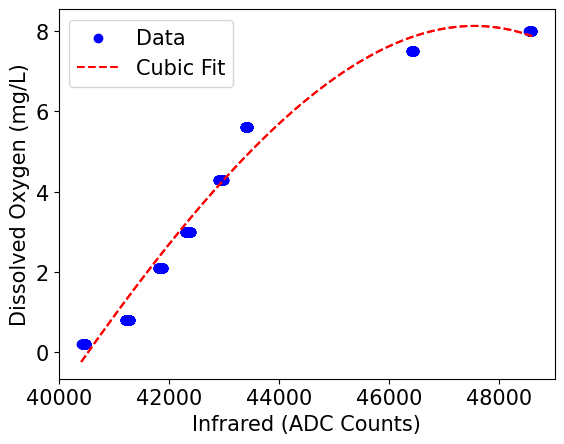

In [ ]:
#Beta: [-9.43705203e-17  8.82469317e-12 -2.02647275e-07  0.00000000e+00
  #0.00000000e+00]

d = -9.43705203e-17
c = 8.82469317e-12
b = -2.02647275e-07
a = 0.00000000e+00
e =  0.00000000e+00
#Beta: [-1.15539131e-14  1.53699643e-09 -6.79839659e-05  1.00000000e+00
  #1.00000000e+00]

def objective(x, a, b, c, d, e):
    return a * x + b * x**2 + c * x**3 + d * x**4 + e
# print('y = ax + bx^2 + cx^3 + dx^4 + e')
print("y = ax + bx\u00b2 + cx\u00b3 + dx\u2074 + e")
#print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f' % (a, b, c, d, e))
print('a:', a)
print('b:', b)
print('c:', c)
print('d:', d)
print('e:', e)
# plot input vs output
plt.scatter(x, y, label='Data', color='blue')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.title("Quartic Function")
plt.plot(x_line, y_line, '--', label='Cubic Fit', color='red')

pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared (ADC)")
plt.legend()
pyplot.show()

In [ ]:
c = -3.75838065e-12
b = 3.55380650e-07
a = -8.23132128e-03
d =  0.00000000e+00
#Beta: [-3.76624639e-12  3.56786949e-07 -8.30144497e-03  1.00000000e+00]
c = -3.76624639e-12
b = 3.56786949e-07
a = -8.30144497e-03
d = 1.00000000e+00



def objective(x, a, b, c, d):
    return a * x + b * x**2 + c * x**3 + d
# print('y = ax + bx^2 + cx^3 + dx^4 + e')
print("y = ax + bx\u00b2 + cx\u00b3 + d")
#print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f' % (a, b, c, d, e))
print('a:', a)
print('b:', b)
print('c:', c)
print('d:', d)
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.title("Quartic Function")
pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared")
pyplot.show()

y = ax + bx² + cx³ + dx⁴ + e
a: 0.0
b: -2.02647275e-07
c: 8.82469317e-12
d: -9.43705203e-17
e: 0.0


<ipython-input-50-bfaa4432a15f>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


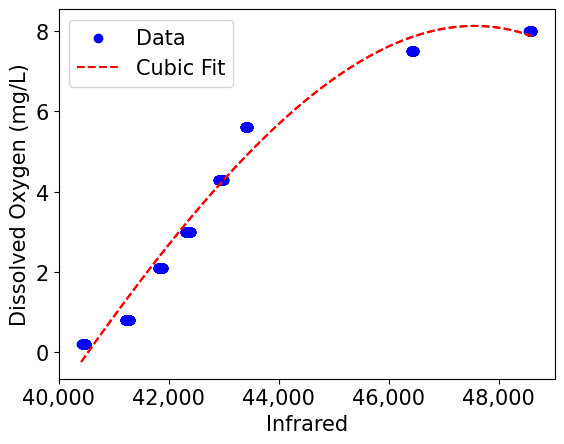

In [50]:
#Beta: [-9.43705203e-17  8.82469317e-12 -2.02647275e-07  0.00000000e+00
  #0.00000000e+00]

d = -9.43705203e-17
c = 8.82469317e-12
b = -2.02647275e-07
a = 0.00000000e+00
e =  0.00000000e+00

#Beta: [-1.15539131e-14  1.53699643e-09 -6.79839659e-05  1.00000000e+00
  #1.00000000e+00]

def objective(x, a, b, c, d, e):
    return a * x + b * x**2 + c * x**3 + d * x**4 + e
# print('y = ax + bx^2 + cx^3 + dx^4 + e')
print("y = ax + bx\u00b2 + cx\u00b3 + dx\u2074 + e")
#print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f' % (a, b, c, d, e))
print('a:', a)
print('b:', b)
print('c:', c)
print('d:', d)
print('e:', e)
# plot input vs output
plt.scatter(x, y, label='Data', color='blue')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.title("Quartic Function")
plt.plot(x_line, y_line, '--', label='Cubic Fit', color='red')

pyplot.ylabel("Dissolved Oxygen (mg/L)")
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
pyplot.xlabel("Infrared")
plt.legend()
pyplot.show()

In [ ]:

y_pred = objective(x, a, b, c, d, e)
print('R2: ', r2_score(y, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y, y_pred)))

R2:  0.9799043225035995
RMSE: 0.388736870933699


y = a/(1+e^(-b*x(x-c)))
a: 7.77769263
b: 0.00134745562
c: 42743.0944


<ipython-input-49-1b0251aabe6e>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


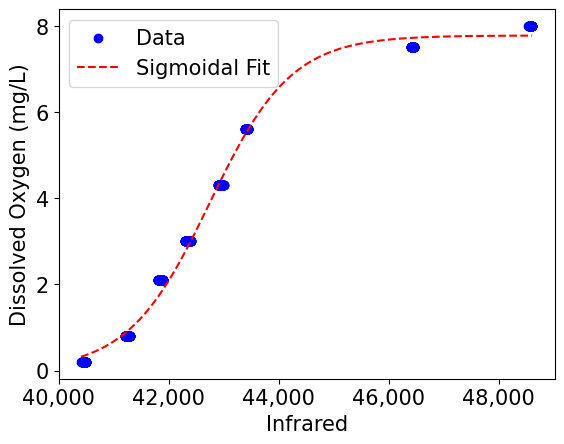

In [49]:
#Beta: [7.77769263e+00 1.34745562e-03 4.27430944e+04]
a = 7.77769263e+00
b = 1.34745562e-03
c = 4.27430944e+04


def objective(x, a, b, c):
    return a/(1 + np.exp(-b*(x-c)))

    #def sigmoidal_f(p,x):
 # a, b, c = p
  #return a/(1 + np.exp(-(b*(x-c))))

  #def sigmoidal_f(p,x):
  #a, b = p
  #return 1/(1 + np.exp(-(a*(x-b))))

# Print the parameters
print("y = a/(1+e^(-b*x(x-c)))")
print('a:', a)
print('b:', b)
print('c:', c)

# Plot input vs. output
plt.scatter(x, y, label='Data', color='blue')
plt.xlabel('X')
plt.ylabel('Y')

# Define a sequence of inputs for the line plot
x_line = np.linspace(min(x), max(x), 100)
y_line = objective(x_line, a, b, c)

# Create a line plot for the sigmoidal model
pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared")

plt.plot(x_line, y_line, '--', label='Sigmoidal Fit', color='red')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend()
plt.show()

y = a/(1+e^(-b*x(x-c)))
a: 7.77769263
b: 0.00134745562
c: 42743.0944


<ipython-input-60-bc48b9b6d60a>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


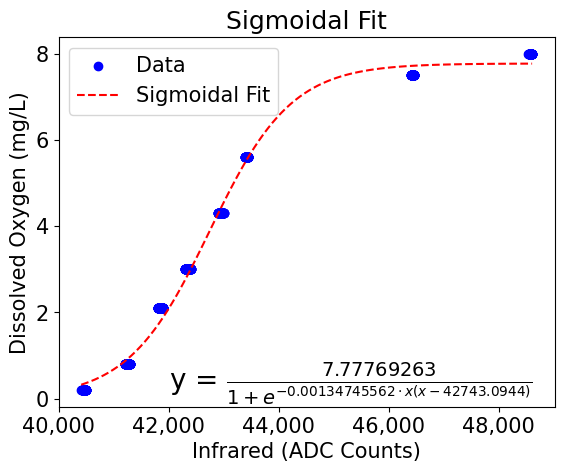

In [60]:
#Beta: [7.77769263e+00 1.34745562e-03 4.27430944e+04]
a = 7.77769263e+00
b = 1.34745562e-03
c = 4.27430944e+04


def objective(x, a, b, c):
    return a/(1 + np.exp(-b*(x-c)))

    #def sigmoidal_f(p,x):
 # a, b, c = p
  #return a/(1 + np.exp(-(b*(x-c))))

  #def sigmoidal_f(p,x):
  #a, b = p
  #return 1/(1 + np.exp(-(a*(x-b))))

# Print the parameters
print("y = a/(1+e^(-b*x(x-c)))")
print('a:', a)
print('b:', b)
print('c:', c)

# Plot input vs. output
plt.scatter(x, y, label='Data', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sigmoidal Fit')

# Define a sequence of inputs for the line plot
x_line = np.linspace(min(x), max(x), 100)
y_line = objective(x_line, a, b, c)

# Create a line plot for the sigmoidal model
pyplot.ylabel("Dissolved Oxygen (mg/L)")
pyplot.xlabel("Infrared (ADC Counts)")

plt.plot(x_line, y_line, '--', label='Sigmoidal Fit', color='red')
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# Center coordinates
center_x = np.mean(xlim)
center_y = np.mean(ylim)
#y = a/(1+e^(-b*x(x-c)))
a = 7.77769263
b = 0.00134745562
c = 42743.0944
equation = r"y = $\frac{%s}{1 + e^{−%s \cdot x(x-%s)}}$" % (a, b, c)
pyplot.text(center_x-2500, y.min(), equation, fontsize = 20)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend()
plt.show()

In [ ]:
y_pred = objective(x, a, b, c)
print('R2: ', r2_score(y, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y, y_pred)))

R2:  0.9950208893747859
RMSE: 0.19349970004001124


a: 0.0010050448414601772
b: -39.69121515523069
c: 42728.09788886271
d: 1.0
e: 69955.23592083159


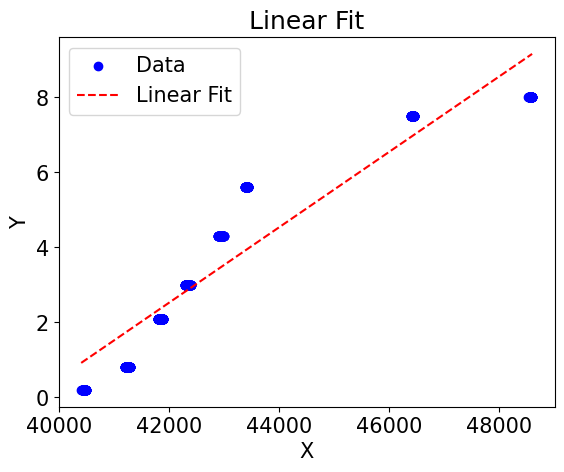

In [ ]:
def objective(x, a, b):
    return a*x+b

# Curve fit
popt, pcov = curve_fit(objective, x, y, p0=(1, -1))

# Extract the parameters
a, b = popt

# Print the parameters
print('a:', a)
print('b:', b)
print('c:', c)
print('d:', d)
print('e:', e)

# Plot input vs. output
plt.scatter(x, y, label='Data', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Fit')

# Define a sequence of inputs for the line plot
x_line = np.linspace(min(x), max(x), 100)
y_line = objective(x_line, a, b)

# Create a line plot for the sigmoidal model
plt.plot(x_line, y_line, '--', label='Linear Fit', color='red')
plt.legend()
plt.show()

In [ ]:
y_pred = objective(x, *popt)
print('R2: ', r2_score(y, y_pred))
print('MSE:', mean_squared_error(y, y_pred))

R2:  0.8909447892938283
MSE: 0.8200781446337385
